In [10]:
import pandas as pd
import numpy as np
import json

def load_json(x):
    return json.loads(x)

df = pd.read_csv('./search.card_search_index.rs10K.csv')
df['prod_name'] = df['prod_name'].apply(load_json)
df['prod_brand_name'] = df['prod_brand_name'].apply(load_json)
df['prod_categories'] = df['prod_categories'].apply(load_json)
df.head()

,id,description,place,keyword_list,image_url,view_count,scrap_count,reply_count,praise_count,share_count,...,best_value,rank_value,is_project,created_at,color,type,video_duration,prod_name,prod_brand_name,prod_categories
0,14592785,댕댕이와 함께,2,"오하우스시즌5,오하우스",https://bucketplace-v2-development.s3.amazonaw...,77,0,0,2,0,...,18,0.0,False,2022-01-28 17:05:07.000,[],CardImage,NaN,[],[],[]
1,5592718,배송은 지방이라 일주일정도 걸렸어요\r\n기본색으로 할까 고민하다가 집이 전체적으로...,11,NaN,https://bucketplace-v2-development.s3.amazonaw...,0,0,0,5,0,...,6,0.0,False,2020-09-16 05:45:13.000,[],CardImage,NaN,[아이비 아카시아 원목 침대프레임+매트선택 2colors (SS/Q)],[올쏘퍼니처],[가구 > 침대 > 일반침대 > 단품]
2,8042736,NaN,2,NaN,https://bucketplace-v2-development.s3.amazonaw...,13,0,0,0,0,...,0,0.0,False,2021-02-04 16:20:19.000,"["""",""beige-grey""]",CardImage,NaN,[],[],[]
3,13601636,NaN,14,NaN,https://bucketplace-v2-development.s3.amazonaw...,0,0,0,0,0,...,0,0.0,False,2021-12-15 14:10:20.000,[],CardImage,NaN,[],[],[]
4,14339498,<p>거울을 좋아하는 저는 여기에도 거울을 설치했어요. 사무엘스몰즈 거울을 사고 싶...,1,NaN,https://bucketplace-v2-development.s3.amazonaw...,62,9,0,1,0,...,1227,0.0,True,2022-01-17 09:53:57.000,[],CardImage,NaN,"[다용도 타일카페트, 비산 파손방지 강화 안전 대형 전신거울 400/600/700]","[우드리퍼블릭, 천일카페트 ]","[가구 > 거울 > 전신거울, 패브릭 > 러그/카페트/매트 > 매트 > 다용도/주방..."


In [90]:
df['type'].value_counts()

CardImage    9956
CardVideo      44
Name: type, dtype: int64

## 데이터 분석
* 각 필드별 na 비율


In [74]:
# The info method prints to the screen the number of non-missing values of each column,
# along with the data types of each column and some other meta-data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   description        5794 non-null   object 
 2   place              10000 non-null  int64  
 3   keyword_list       3603 non-null   object 
 4   image_url          10000 non-null  object 
 5   view_count         10000 non-null  int64  
 6   scrap_count        10000 non-null  int64  
 7   reply_count        10000 non-null  int64  
 8   praise_count       10000 non-null  int64  
 9   share_count        10000 non-null  int64  
 10  user_id            10000 non-null  int64  
 11  nickname           10000 non-null  object 
 12  follower_count     5800 non-null   float64
 13  user_card_count    10000 non-null  int64  
 14  company            1010 non-null   object 
 15  userable_type      10000 non-null  object 
 16  profile_image_url  1000

In [8]:
# missing value ratio
# df.isna().sum() / len(df) * 100

def list_to_na(x):
    if len(x) == 0:
        return np.nan
    return x
    
new_df = df.copy()
new_df['prod_name'] = new_df['prod_name'].apply(list_to_na)
new_df['prod_brand_name'] = new_df['prod_brand_name'].apply(list_to_na)
new_df['prod_categories'] = new_df['prod_categories'].apply(list_to_na)
new_df.isna().mean() * 100

id                    0.00
description          42.06
place                 0.00
keyword_list         63.97
image_url             0.00
view_count            0.00
scrap_count           0.00
reply_count           0.00
praise_count          0.00
share_count           0.00
user_id               0.00
nickname              0.00
follower_count       42.00
user_card_count       0.00
company              89.90
userable_type         0.00
profile_image_url     0.00
area                 40.13
style                58.92
card_style           61.76
project_style        97.16
residence            39.26
card_residence       58.27
project_residence    80.99
best_value            0.00
rank_value            0.00
is_project            0.00
created_at            0.00
color                 0.00
type                  0.00
video_duration       99.56
prod_name            52.44
prod_brand_name      52.44
prod_categories      52.44
dtype: float64

In [16]:
# keyword_list, prod_* 관계
print(len(new_df.loc[(new_df['keyword_list'].isnull()) & (new_df['prod_name'].isnull())]) / len(df))
print(len(new_df.loc[(new_df['description'].isnull()) & (new_df['keyword_list'].isnull())]) / len(df))
print(len(new_df.loc[(new_df['description'].isnull()) & (new_df['keyword_list'].isnull()) & (new_df['prod_name'].isnull())]) / len(df))

0.3768
0.3405
0.2262


In [13]:
df.describe()

,id,place,view_count,scrap_count,reply_count,praise_count,share_count,user_id,follower_count,user_card_count,area,style,card_style,project_style,residence,card_residence,project_residence,best_value,rank_value,video_duration
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,5800.000000,10000.000000,5987.000000,4108.000000,3824.000000,284.000000,6074.000000,4173.000000,1901.000000,10000.000000,10000.000000,44.000000
mean,7.325956e+06,4.209800,392.285500,6.501400,0.081200,3.048300,0.848500,5.395324e+06,566.660517,1886.545000,2.266578,2.181353,2.225680,1.584507,1.166941,1.124371,1.260389,2003.932000,6.187200,19.409091
std,4.542882e+06,4.122048,2262.712439,35.514734,0.681655,16.562645,5.490898,4.241556e+06,1862.338203,10311.907381,1.340877,2.132105,2.146373,1.831190,0.960501,0.979959,0.909629,13484.493305,450.360335,14.678442
min,1.070000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,3.282328e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.724682e+06,6.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,9.000000
50%,7.486812e+06,2.000000,18.000000,0.000000,0.000000,1.000000,0.000000,4.455661e+06,80.000000,41.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,26.000000,0.000000,13.000000
75%,1.115103e+07,7.000000,135.000000,1.000000,0.000000,4.000000,0.000000,8.171884e+06,318.500000,267.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,480.000000,0.000000,24.250000
max,1.536498e+07,14.000000,150904.000000,1293.000000,33.000000,1472.000000,279.000000,1.722908e+07,21262.000000,82776.000000,5.000000,8.000000,8.000000,7.000000,6.000000,6.000000,6.000000,783796.000000,43212.000000,59.000000


In [87]:
# skewness
df.select_dtypes(np.number).skew()

id                   -0.012867
place                 1.146009
view_count           36.506504
scrap_count          17.833992
reply_count          21.046397
praise_count         71.075771
share_count          28.422539
user_id               0.729719
follower_count        7.951654
user_card_count       6.970028
area                 -0.056325
style                 0.922491
card_style            0.904247
project_style         1.133140
residence             2.162180
card_residence        1.984599
project_residence     2.739430
best_value           36.204501
rank_value           89.924281
video_duration        1.493261
dtype: float64

In [88]:
# kurtosis
df.select_dtypes(np.number).kurt()

id                     -1.222323
place                  -0.031299
view_count           2135.606614
scrap_count           474.985057
reply_count           719.400547
praise_count         6201.385047
share_count          1172.711297
user_id                -0.424061
follower_count         78.087097
user_card_count        48.561420
area                   -0.527400
style                   0.562529
card_style              0.534870
project_style           0.782591
residence               7.254450
card_residence          6.472139
project_residence       9.563102
best_value           1792.618366
rank_value           8506.434352
video_duration          1.231465
dtype: float64

In [21]:
# zero count
# TODO: 0의 비율인데 이렇게 구하면 그냥 숫자의 평균값이지
(df.head(5).select_dtypes(np.number) == 0).mean(axis=1)

0    0.20
1    0.25
2    0.30
3    0.35
4    0.25
dtype: float64

17.833991813889753
AxesSubplot(0.125,0.125;0.775x0.755)
21.046397477689258
AxesSubplot(0.125,0.125;0.775x0.755)
71.07577076116624
AxesSubplot(0.125,0.125;0.775x0.755)
28.42253947968617
AxesSubplot(0.125,0.125;0.775x0.755)


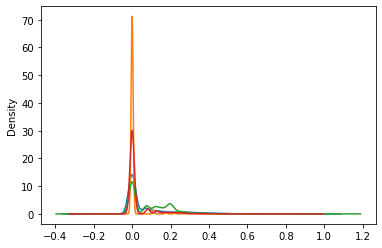

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


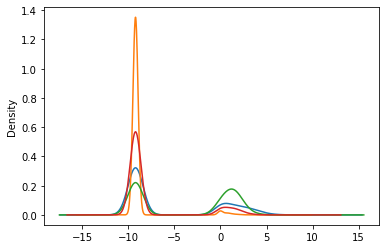

In [86]:
import math
from functools import partial
import matplotlib.pyplot as plt
import numpy as np

def log_norm(count, max):
    return min(1.0, math.log(count + 1) / math.log(max + 1))

def is_int(x):
    return True if isinstance(x, int) else False

"""
                    "view_count_log": log_norm(view_count, 1000000),
                    "scrap_count": r.get("scrap_count", 0),
                    "scrap_count_log": log_norm(scrap_count, 20000),
                    "scrap_score": scrap_score,
                    "reply_count": r.get("reply_count", 0),
                    "reply_count_log": log_norm(r.get("reply_count", 0), 500),
                    "praise_count": r.get("praise_count", 0),
                    "praise_count_log": log_norm(r.get("praise_count", 0), 10000),
                    "share_count": r.get("share_count", 0),
                    "share_count_log": log_norm(r.get("share_count", 0), 5000),
                    "user_id": r.get("user_id"),
                    "nickname": r.get("nickname"),
                    "profile_image_url": r.get("profile_image_url"),
                    "follower_score": follower_score,
                    "follower_count_log": log_norm(follower_count, 100000),
                    "user_card_count_score": user_card_count_score,
                    "user_card_count_log": log_norm(user_card_count, 100000),
                    "company": r.get("company"),
                    "userable_type": r.get("userable_type"),
                    "has_tag": len(json.loads(r.get("prod_name") or [])) > 0,
"""
# df[['scrap_count', 'reply_count', 'praise_count', 'share_count']].apply(log_norm, axis=1)
# df[['scrap_count', 'reply_count', 'praise_count', 'share_count']].apply(lambda x: log_norm(x if isinstance(x, float) else 0), axis=0)
for col_name, max_val in zip(['scrap_count', 'reply_count', 'praise_count', 'share_count'], [20000, 500, 10000, 5000]):
    #print(df[col_name].apply(partial(log_norm, max=max_val)).describe())
    print(df[col_name].skew())
    print(df[col_name].apply(partial(log_norm, max=max_val)).plot.kde())

# for col_name, max_val in zip(['scrap_count', 'reply_count', 'praise_count', 'share_count'], [20000, 500, 10000, 5000]):
#     mean_val = np.mean(df[col_name])
#     std_val = np.std(df[col_name])
#     #print(df[[col_name]].apply(lambda x: (x - mean_val)/std_val, axis=0).plot.density())
#     print(df[[col_name]].apply(lambda x: (x - mean_val)/std_val, axis=0))
plt.show()


def log_val(x):
    return np.log(x+0.0001)

for col_name, max_val in zip(['scrap_count', 'reply_count', 'praise_count', 'share_count'], [20000, 500, 10000, 5000]):
    #print(df[col_name].apply(partial(log_norm, max=max_val)).describe())
    print(df[col_name].apply(log_val).plot.kde())

In [52]:
df['scrap_count'].apply(is_int).unique()

array([ True])